# Multilayer Perceptron Neural Network with backpropagation

Ce TP a été réalisé par: 
- Antoine Daigneault-Demers (1879075)
- Jérémie Huppé (1854753)

Note: La dérivation des équations ainsi que le pseudo-code ont été réalisés séparément et deux rapports ont été soumis tel que demandé dans l'énoncé.

# Partie 1

## Question a)

Voir le rapport pour une représentation graphique du réseau simple ainsi que la dérivation des équations et le pseudo-code. 

Ci-dessous se trouve seulement la dérivation des équations et le pseudo-code (qui se trouvent aussi dans le rapport).

# Dérivation des équations pour la rétropropragation

La dérivation des équations pour un réseau simple sera premièrement présentée et ensuite les équations sous forme matricielle seront détuites de ces dernières.

##  Fonction de perte

La fonction de coût log loss (ou cross entropy) utilisée avec les équations sous forme matricielle est:

$$ L = - \sum_{\substack{1<i<N}} \sum_{\substack{1<k<K}} y_k^i log( f_k(x_i) ) $$

avec:
* **K** le nombre de classes
* **N** le nombre d'exemples dans les données
* $ f_k(x_i)  $  la probabilité que l'exemple i soit de la classe k
* $y_k^i$ vecteur dont la valeur vaut 1 si la classe cible de l'exemple i est k, 0 sinon


La fonction de coût log loss (ou cross entropy) utilisée pour la dérivation (voir ci-dessous) des équations pour un réseau simple est:

$$ L = - \sum_{\substack{1<k<K}} y_k log( f_k(x) ) $$

Pour la dérivation ci-dessous $ f_k(x) = h^{(out)}_k $


## Mise à jour des poids

L'équation utilisée pour la mise à jour des poids pour un réseau simple est :

$$ w^{(i→j)} = w^{(i→j)} - η \frac{dL}{dw^{(i→j)}} $$


### Mise à jour des poids de la dernière couche :

#### Pour un réseau simple :

Nous cherchons donc à trouver : 

$$ \frac{dL}{dw^{(L→out)}} $$

- $ w^{(L→out)} $ : est le vecteur de poids entre la $ L^{ième}$ et la couche de sortie $ out $.

En utilisant la règle de dérivées chaînées nous obtenons:

$$ \frac{dL}{dw^{(L→out)}} = \frac{dL}{dh^{(out)}} \frac{dh^{(out)}}{da^{(out)}} \frac{da^{(out)}}{dw^{(L→out)}} $$


Voici le détail des calculs pour chacune des dérivées partielles présentées ci-dessus:

$$ \frac{dL}{dh^{(out)}_i} = - \frac{y_i}{h^{(out)}_i}  $$

$$ i = k :=  \frac{dh^{(out)}_i}{da^{(out)}_k} = h^{(out)}_i(1-h^{(out)}_i)) $$

$$ i \neq k :=  \frac{dh^{(out)}_i}{da^{(out)}_k} = - h^{(out)}_i h^{(out)}_k $$


Nous regroupons $ \frac{dL}{dh^{(out)}} $ et $ \frac{dh^{(out)}}{da^{(out)}} $ en $\frac{dL}{a^{(out)}}$ nous cherchons donc: 

$$ \frac{dL}{dw^{(L→out)}} = \frac{dL}{a^{(out)}} \frac{da^{(out)}}{dw^{(L→out)}} $$

Voici le détail des calculs pour obtenir $\frac{dL}{a^{(out)}}$ à partir de $ \frac{dL}{dh^{(out)}} $ et $ \frac{dh^{(out)}}{da^{(out)}} $ trouvés ci-dessus : 

$$ \frac{dL}{a^{(out)}_i} = \sum_{\substack{k}}^{n.class} \frac{dL}{dh^{(out)}_k} \frac{dh^{(out)}_k}{da^{(out)}_i} $$ 

$$ =  \frac{dL}{dh^{(out)}_i} \frac{dh^{(out)}_i}{da^{(out)}_i} - \sum_{\substack{k \neq i}} \frac{dL}{dh^{(out)}_k} \frac{dh^{(out)}_k}{da^{(out)}_i} $$ 

$$ = -y_i(1-h^{(out)}_i) + \sum_{\substack{k \neq i}} y_k h^{(out)}_i $$ 

$$ = -y_i + h^{(out)}_i  \sum_{\substack{k}} y_k $$ 

Puisque $ \sum_{\substack{k}} y_k = 1 $ Nous obtenons donc :

$$ \frac{dL}{a^{(out)}_i} = h^{(out)}_i - y_i $$


Définissons $\delta^{(out)}$ comme étant:

$$ \delta^{(out)} =  \frac{dL}{a^{(out)}} = h^{(out)} - y $$


Ensuite nous trouvons :

$$ \frac{da^{(out)}}{dw^{(L→out)}} = h^{(L)}  $$

En regroupant les dérivations trouvées ensembles nous obtenons :

$$ \frac{dL}{dw^{(L→out)}} = \frac{dL}{a^{(out)}} \frac{da^{(out)}}{dw^{(L→out)}} = \delta^{(out)} h^{(L)} $$

#### Sous forme matricielle :

Sous forme matricielle nous obtenons donc :

- L'ensemble des $\delta^{(out)}$ sont groupés dans la matrice $ D^{(out)} $ qui est obtenue avec :

$$ D^{(out)} = (H^{out} - Y)^T $$ 

- La mise à jour des poids de la couche de sortie sous formes matricielle peut donc s'obtenir à l'aide : 
$$ W^{(L→out)} = W^{(L→out)} −η(D^{(out)}H^{(out)})^T $$



### Mise à jour des poids pour les couches cachées :


$$ \frac{dL}{dw^{(i→j)}} $$

- $ w^{(i→j)} $ : est le vecteur de poids entre la couche $ i $ et la couche $ j $.

En utilisant la règle de dérivées chaînées nous obtenons:

$$ \frac{dL}{dw^{(i→j)}} = \frac{dL}{dh^{(j)}} \frac{dh^{(j)}}{da^{(j)}} \frac{da^{(j)}}{dw^{(i→j)}} $$

Voici le détail des calculs pour chacune des dérivées partielles présentées ci-dessus:

$$ \frac{dL}{h^{(i)}} = \sum_{\substack{k ∈ outs(j)}} \frac{dL}{da^{(k)}} \frac{da^{(k)}}{h^{(i)}} = \sum_{\substack{k ∈ outs(j)}} \delta^{(k)} w^{(j→k)} $$ 

Ensuite nous trouvons :

$$ \frac{dh^{(i)}}{da^{(j)}} = f_{ReLU}^{'}(a^{(j)})  $$


Ensuite nous trouvons :

$$ \frac{da^{(i)}}{dw^{(i→j)}} = h^{(i)}  $$


En regroupant les dérivations trouvées ensembles nous obtenons :

$$ \frac{dL}{dw^{(i→j)}} = h^{(i)} f_{ReLU}^{'}(a^{(j)}) \sum_{\substack{k ∈ outs(j)}} \delta^{(k)} w^{(j→k)} $$


Posons la relation recursive suivante : $ \delta^{(j)} = f_{ReLU}^{'}(a^{(j)}) \sum_{\substack{k ∈ outs(j)}} \delta^{(k)} w^{(j→k)} $

Nous obtenons donc: 

$$ \frac{dL}{dw^{(i→j)}} = \delta^{(j)} h^{(i)} $$



Sous forme matricielle nous obtenons donc :

- L'ensemble des $\delta^{(i)}$ sont groupés dans la matrice $ D^{(i)} $ qui est obtenue avec :

$$ D^{(i)} = Fp^{(i)} ⊙ W^{(i→j)} D^{(j)} $$



- La mise à jour des poids de la couche de sortie sous formes matricielle peut donc s'obtenir à l'aide : 
$$ W^{(i→j)} = W^{(i→j)} −η(D^{(j)}H^{(i)})^T $$ 



## Algorithme détaillé sous forme matricielle (Pseudo-code)

#### **1. Propagation**

##### **1.1 Couche d'entrée :**

Propager les données en entrées avec  $ A^{(1)} = XW^{(in → 1)}$.

où :


- $ A^{(i)} $ : est la matrice qui contient les _inputs_ de la couche $i$.
- $ X $ : est une matrice n x m avec n exemple qui ont m features.
- $ W^{(i→j)} $ : est la matrice de poids entre la couche $i$ et la couche $j$. Note importante: $ W $ est considéré ici comme étant l'équivalent de $\Theta$ nous avons donc :  $ W = \Theta = [W \; b] $ où $b$ est le biais. Les matrices d'entrées sont ajustées en conséquence avec l'ajout d'une colonne de $1$ à la fin de celles-ci.

##### **1.2 Couches cachées :**

Pour chaque couche cachée :

Évaluer $ H^{(i)} = f_{ReLU}({A^{(i)}})$  et l'enregistrer pour la présente couche. 

Propager les données reçues en entrée avec $ A^{(j)} = H^{(i)}W^{(i → j)}$.

Enregistrer la dérivié de la fonction d'activation appliquée à $A^{(i)}$ pour la rétropropaganation, $ Hp^{(i)} = (f_{ReLU}^{'}({A^{(i)}}))^T$. 


où :


- $ H^{(i)} $ : est la matrice résultante de l'application de la fonction $f_{ReLU}$ à la matrice $ A^{(i)} $
- $ f_{ReLU} $ : est la fonction d'activation. Ici la fonction d'activation utilisée pour les couches cachées est la fonction $ReLU$.
- $ f_{ReLU}^{'} $ : est la dérivée de la fonction d'activation $ f_{ReLU} $.
- $ Hp^{(i)} $ : est la matrice qui contient les dérivées de la fonction d'activation.


##### **1.3 Couche de sortie :**

Propager la prédiction pour $ H_{iy}^{(out)} = f_{Softmax}({A^{(L+1)}})$.

où :

- $ f_{Softmax} $ : est la fonction d'activation. Ici la fonction d'activation utilisée pour la couche de sortie est la fonction $Softmax$.

#### **2. Rétropropagation**

Initialiser la matrice des deltas $D$ de la couche de sortie avec $ D^{(out)} = (H^{out} - Y)^T $. 



Pour chaque couche cachée (de la dernière à la première) : Mettre à jour la matrice $D$ avec $ D^{(i)} = Fp^{(i)} ⊙ W^{(i→j)} D^{(j)}$.

où :

- $D^{(i)}$ est la matrice des deltas associée à la couche $i$. 
- ⊙ est la multiplication par élément.


#### **3. Mise à jour des poids**

Mettre à jour les poids de la couche d'entrée avec $W^{(in→1)} = W^{(in→1)} −η(D^{(1)}X)^T$.

Mettre à jour les poids des couches cachées avec $W^{(i→j)} = W^{(i→j)} −η(D^{(j)}H^{(i)})^T$

où :

- η : est le taux d'apprentissage.


## Question b)

Caractéristiques du réseau: 
- Une couche d'entrée de 784 unités.
- Deux couches cachées de 300 unités.
- Une couche de sortie de 10 unités.
- Une taille de minibatch de 256.
- Un nombre d’epoch de 100.
- Une fonction d’activation ReLU pour les couches cachées.
- Une fonction d’activation Softmax pour la couche de sortie.
- La fonction de coût (loss function) est la cross-entropy.
- Un taux d’apprentissage de 0.001.


### Implémentation du réseau sans librairie

In [0]:
import matplotlib.pyplot as plt

def plot_accuracies(train_accuracies, validation_accuracies):   
    plt.figure(figsize=(12,12))
    plt.rcParams.update({'font.size': 15})
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch") 
    plt.plot(train_accuracies, label="train")
    plt.plot(validation_accuracies, label="validation")
    plt.legend(loc="upper right")
        
    plt.show()

In [0]:
def plot_losses(train_losses, validation_losses):   
    plt.figure(figsize=(12,12))
    plt.rcParams.update({'font.size': 15})
    plt.ylabel("Loss")
    plt.xlabel("Epoch") 
    plt.plot(train_losses, label="train")
    plt.plot(validation_losses, label="validation")
    plt.legend(loc="upper right")
        
    plt.show()

In [0]:
import numpy as np
import time

class Layer:
    # Activation function
    def h_relu(self, X):
        return np.maximum(0, X)
    
    # Derivative of activation function
    def hp_relu(self, X):
        X[X <= 0] = 0
        X[X > 0] = 1
        return X
    
    # Activation function of output layer
    def f_softmax(self, x):
        e_x = np.exp(x - np.max(x, axis = 1, keepdims = True))
        return e_x / e_x.sum(axis=1, keepdims = True)

    def __init__(self, layer_id, size, minibatch_size, is_input=False, is_output=False):
        self.is_input = is_input
        self.is_output = is_output
        self.layer_id = layer_id

        # H contient les données de sorties de la présente couche
        self.H = np.zeros((minibatch_size, size[0]))
        # W contient les poids
        self.W = None
        # A contient les données en entrée de la présente couche
        self.A = None
        # D contient les deltas de la présente couche
        self.D = None
        # Hp contient les dérivés de la fonction d'activation
        self.Hp = None

        if is_output:
            self.activation = self.f_softmax
        else:
            self.activation = self.h_relu

        if not is_input:
            self.A = np.zeros((minibatch_size, size[0]))
            self.D = np.zeros((minibatch_size, size[0]))

        if not is_output:
            np.random.seed(42)
            self.W = np.random.normal(0, 0.01, size)

        if not is_input and not is_output:
            self.Hp = np.zeros((size[0], minibatch_size))

        
    def forward_propagate(self):
        # For input Layer
        if self.is_input:
            return np.matmul(self.H, self.W)

        # For output Layer, (no bias added)
        if self.is_output:
            return self.activation(self.A)

        # For hidden layers, we add the bias values here
        self.H = self.activation(self.A)
        self.H = np.append(self.H, np.ones((self.H.shape[0], 1)), axis=1)
        self.Hp = self.hp_relu(self.A).T

        return np.matmul(self.H, self.W)


class NN:
    def __init__(self, layer_config, minibatch_size):
        self.layers = []
        self.num_layers = len(layer_config)
        self.minibatch_size = minibatch_size

        for i in range(self.num_layers-1):
            if i == 0:
                # Here, we add an additional unit at the input for the bias weight.
                size = (layer_config[i]+1, layer_config[i+1])
                self.layers.append(Layer("Input layer ", size, minibatch_size, is_input=True))
            else:
                # Here we add an additional unit in the hidden layers for the bias weight.
                size = (layer_config[i]+1, layer_config[i+1])
                self.layers.append(Layer("Hidden layer " + str(i), size, minibatch_size))


        size = (layer_config[-1], None)
        self.layers.append(Layer("Output layer ", size, minibatch_size, is_output=True))

    def forward_propagate(self, data):
        # We need to be sure to add bias values to the input
        self.layers[0].H = np.append(data, np.ones((data.shape[0], 1)), axis=1)

        for i in range(self.num_layers - 1):
            self.layers[i+1].A = self.layers[i].forward_propagate()
        return self.layers[-1].forward_propagate()

    def backpropagate(self, yhat, labels):     
        self.layers[-1].D = (yhat - labels).T

        for i in range(self.num_layers - 2, 0, -1):
            W_nobias = self.layers[i].W[0:-1, :]
            self.layers[i].D = np.matmul(W_nobias, self.layers[i+1].D) * self.layers[i].Hp 

    def update_weights(self, eta):
        for i in range(0, self.num_layers-1):
            W_grad = -eta*(np.matmul(self.layers[i+1].D, self.layers[i].H)).T
            self.layers[i].W += W_grad

    def get_loss(self, y, y_pred):        
        y_pred[y_pred == 0.0] = 1.0e-10
        y_pred[y_pred == 1.0] = 1 - 1.0e-10
        
        m = len(y)
        log_proba = np.log(y_pred)
        cost = y*log_proba
        
        return -np.sum(cost) / m

    def get_accuracy(self, y_pred, y):       
        y_pred_class = np.argmax(y_pred, axis=1) 
        y_class = np.argmax(y, axis=1)
        n = len(y)

        return np.sum(y_class == y_pred_class) / n

    # Propagate forward through the network, record the training error, train the
    # weights with backpropagation
    def train(self, X, Y, eta):
        output = self.forward_propagate(X)
        self.backpropagate(output, Y)
        self.update_weights(eta=eta)

    # Just pass the data forward through the network and return the predictions
    def test(self, X):
        return self.forward_propagate(X)

    def evaluate(self, X_train, y_train, X_validation, y_validation, num_epochs=500, eta=0.001):
        startTime = time.time()

        train_losses = []
        validation_losses = []

        train_accuracies = []
        validation_accuracies = []

        for t in range(num_epochs):
            for i in range(0, X_train.shape[0], self.minibatch_size):  
                X_train_minibatch = X_train[i:i + self.minibatch_size]
                y_train_minibatch = y_train[i:i + self.minibatch_size]

                output = self.forward_propagate(X_train_minibatch)
                self.backpropagate(output, y_train_minibatch)
                self.update_weights(eta)

            
            # compute the loss on the train set
            train_loss = self.get_loss(y_train, self.test(X_train))
            train_losses.append(train_loss)
            # compute the loss on the validation set
            val_loss = self.get_loss(y_validation, self.test(X_validation))
            validation_losses.append(val_loss)

            # compute the loss on the train set
            train_acc = self.get_accuracy(self.test(X_train), y_train)
            train_accuracies.append(train_acc)
            # compute the loss on the validation set
            val_acc = self.get_accuracy(self.test(X_validation), y_validation)
            validation_accuracies.append(val_acc)

            elapsedTime = (time.time()-startTime)
            output_str = "Epoch nb.: " + str(t+1)
            output_str += " - Elapsed time : " + str(round(elapsedTime, 4))
            output_str += " - train_loss : " + str(round(train_loss, 4))
            output_str += " - train_acc : " + str(round(train_acc, 4))
            output_str += " - validation_loss : " + str(round(val_loss, 4))
            output_str += " - validation_acc : " + str(round(val_acc, 4))
            print(output_str)

        plot_accuracies(train_accuracies, validation_accuracies)
        plot_losses(train_losses, validation_losses)



Epoch nb.: 1 - Elapsed time : 11.4133 - train_loss : 0.6188 - train_acc : 0.7758 - validation_loss : 0.6411 - validation_acc : 0.7663
Epoch nb.: 2 - Elapsed time : 22.7756 - train_loss : 0.466 - train_acc : 0.8339 - validation_loss : 0.494 - validation_acc : 0.8236
Epoch nb.: 3 - Elapsed time : 34.0824 - train_loss : 0.411 - train_acc : 0.8513 - validation_loss : 0.4458 - validation_acc : 0.8401
Epoch nb.: 4 - Elapsed time : 45.4225 - train_loss : 0.3822 - train_acc : 0.861 - validation_loss : 0.4221 - validation_acc : 0.8487
Epoch nb.: 5 - Elapsed time : 57.0547 - train_loss : 0.3572 - train_acc : 0.8709 - validation_loss : 0.4014 - validation_acc : 0.8543
Epoch nb.: 6 - Elapsed time : 68.4964 - train_loss : 0.3399 - train_acc : 0.8764 - validation_loss : 0.3877 - validation_acc : 0.8583
Epoch nb.: 7 - Elapsed time : 79.856 - train_loss : 0.328 - train_acc : 0.88 - validation_loss : 0.3797 - validation_acc : 0.8618
Epoch nb.: 8 - Elapsed time : 91.2716 - train_loss : 0.3162 - train_ac

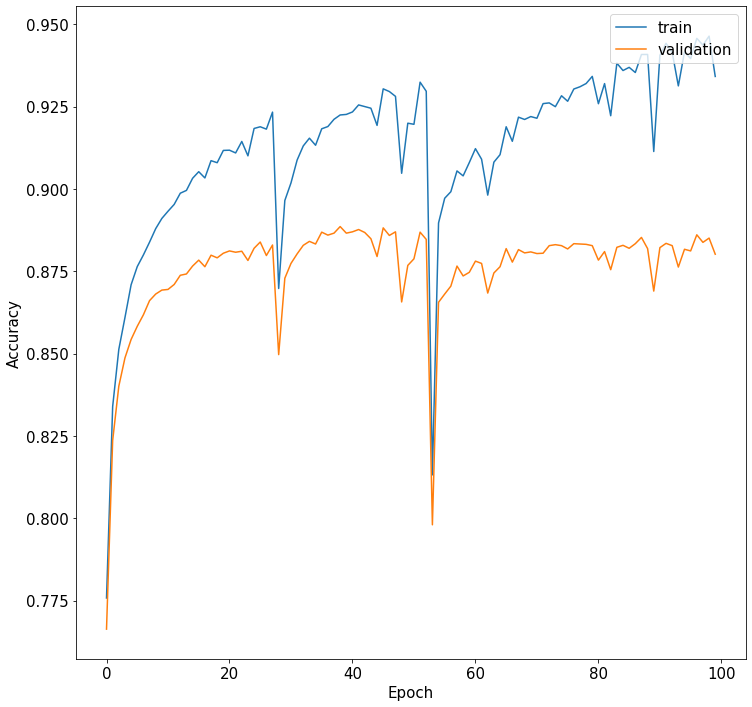

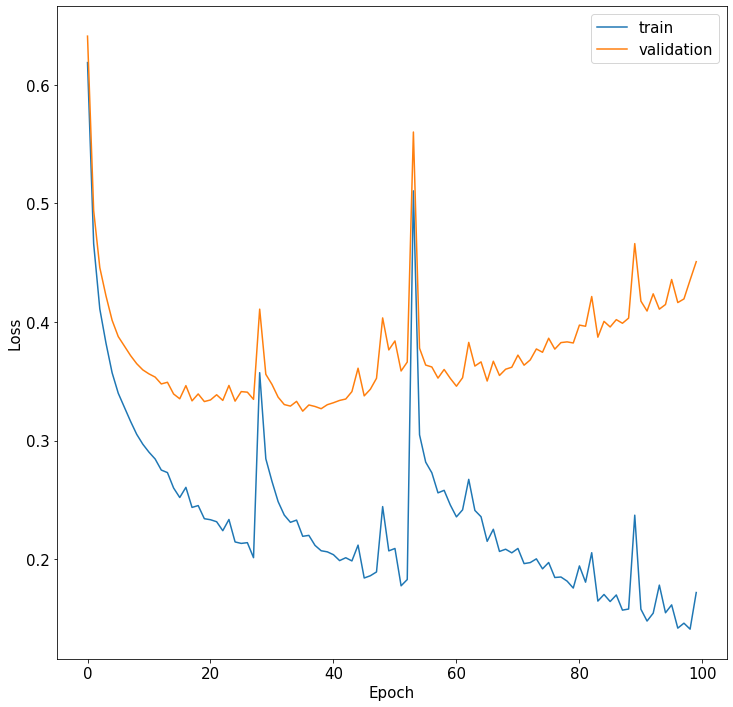

Finished


In [0]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from tensorflow import keras

data = keras.datasets.fashion_mnist

(train_images, train_labels), (validation_images, validation_labels) = data.load_data()


train_images = train_images / 255.0
validation_images = validation_images / 255.0


X_train = train_images
X_train = X_train.flatten().reshape(60000, 784)

y_train = np.zeros((train_labels.shape[0], len(np.unique(train_labels))))
y_train[np.arange(train_labels.shape[0]), train_labels] = 1  # one hot target or shape NxK


X_validation = validation_images
X_validation = X_validation.flatten().reshape(10000, 784)

y_validation = np.zeros((validation_labels.shape[0], len(np.unique(validation_labels))))
y_validation[np.arange(validation_labels.shape[0]), validation_labels] = 1  # one hot target or shape NxK


nn = NN(layer_config=[784, 300, 300, 10], minibatch_size=256)
nn.evaluate(X_train, y_train, X_validation, y_validation, num_epochs=100, eta=0.001)

print("Finished")

### Implémentation du réseau avec Keras

In [1]:
import keras
from keras import optimizers
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.utils import plot_model
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# Plot training & validation accuracy/loss values
def plot(acc_loss, history, batch_size, nb_epochs):
    plt.plot(history.history[acc_loss])
    plt.plot(history.history['val_' + acc_loss])
    plt.title('Model ' + acc_loss + ' avec batch_size de ' + str(batch_size) + " sur " + str(nb_epochs) + " epochs")
    plt.ylabel(acc_loss.capitalize())
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

In [3]:
((x_train, y_train), (x_test, y_test)) = fashion_mnist.load_data()

x_train = x_train.reshape(60000,28,28)
# L'ensemble de test fourni par Keras est utilisé comme ensemble de validation
x_test = x_test.reshape(10000,28,28)

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 46us/step - loss: 2.1260 - accuracy: 0.3072 - val_loss: 1.9347 - val_accuracy: 0.5248
Epoch 2/100
60000/60000 [==============================] - 3s 49us/step - loss: 1.7851 - accuracy: 0.5987 - val_loss: 1.6544 - val_accuracy: 0.6219
Epoch 3/100
60000/60000 [==============================] - 3s 48us/step - loss: 1.5379 - accuracy: 0.6421 - val_loss: 1.4421 - val_accuracy: 0.6425
Epoch 4/100
60000/60000 [==============================] - 2s 38us/step - loss: 1.3526 - accuracy: 0.6554 - val_loss: 1.2856 - val_accuracy: 0.6517
Epoch 5/100
60000/60000 [==============================] - 2s 38us/step - loss: 1.2167 - accuracy: 0.6649 - val_loss: 1.1709 - val_accuracy: 0.6616
Epoch 6/100
60000/60000 [==============================] - 2s 38us/step - loss: 1.1165 - accuracy: 0.6729 - val_loss: 1.0858 - val_accuracy: 0.6689
Epoch 7/100
60000/60000 [==============================] - 2s 

Epoch 56/100
60000/60000 [==============================] - 2s 37us/step - loss: 0.5302 - accuracy: 0.8231 - val_loss: 0.5506 - val_accuracy: 0.8142
Epoch 57/100
60000/60000 [==============================] - 2s 37us/step - loss: 0.5280 - accuracy: 0.8233 - val_loss: 0.5482 - val_accuracy: 0.8150
Epoch 58/100
60000/60000 [==============================] - 2s 37us/step - loss: 0.5256 - accuracy: 0.8241 - val_loss: 0.5464 - val_accuracy: 0.8147
Epoch 59/100
60000/60000 [==============================] - 2s 37us/step - loss: 0.5234 - accuracy: 0.8246 - val_loss: 0.5442 - val_accuracy: 0.8154
Epoch 60/100
60000/60000 [==============================] - 2s 37us/step - loss: 0.5213 - accuracy: 0.8251 - val_loss: 0.5423 - val_accuracy: 0.8155
Epoch 61/100
60000/60000 [==============================] - 2s 37us/step - loss: 0.5191 - accuracy: 0.8256 - val_loss: 0.5403 - val_accuracy: 0.8160
Epoch 62/100
60000/60000 [==============================] - 2s 37us/step - loss: 0.5171 - accuracy: 0.8260

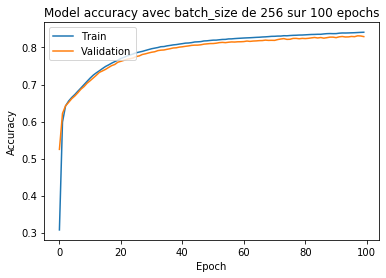

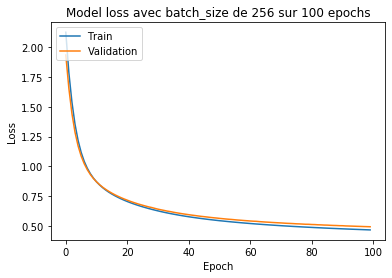

In [4]:
model = Sequential()

model.add(Flatten())

model.add(Dense(units=300, activation='relu'))
model.add(Dense(units=300, activation='relu'))

model.add(Dense(units=10, activation='softmax'))

sgd = optimizers.SGD(lr=0.001, decay=0, momentum=0.0, nesterov=False)
model.compile(sgd, loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 256
nb_epochs = 100
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=nb_epochs, batch_size=batch_size)

plot("accuracy", history, batch_size, nb_epochs)
plot("loss", history, batch_size, nb_epochs)

### Références 

Ces ressources ont été utilisées comme inspiration pour la structure du code et validation des dérivations obtenues. 

[1] I-Ta Lee's Notes on Backpropagation with Cross Entropy: https://doug919.github.io/notes-on-backpropagation-with-cross-entropy/

[2] BRIAN DOLHANSKY's Artificial Neural Networks blog: http://www.briandolhansky.com/blog?fbclid=IwAR3TvmZS6Ox7rXNJR9izruY5Iwcf_ovEIXiIy0Gr8kYeqgmYxuAA45arpAM

[3] Backpropagation - Wikipedia: https://en.wikipedia.org/wiki/Backpropagation

# Partie 2

Note: dans la légende des graphiques présentés ci-dessous la courbe 'Test' devrait être 'Validation'.
Par limite de temps nous n'avons pas pu regénérer l'ensemble 
des graphiques ci-dessous puisqu'entrainer les modèles prend un temps non négligeable. Par contre, nous avons ajusté
les graphiques présentés dans le rapport afin qu'ils aient la 
bonne légende.

In [1]:
import keras
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.utils import plot_model
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# Plot training & validation accuracy/loss values
def plot(acc_loss, history, batch_size, nb_epochs):
    plt.plot(history.history[acc_loss])
    plt.plot(history.history['val_' + acc_loss])
    plt.title('Model ' + acc_loss + ' avec batch_size de ' + str(batch_size) + " sur " + str(nb_epochs) + " epochs")
    plt.ylabel(acc_loss.capitalize())
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left') # Note: dans la légende la courbe 'Test' devrait être 'Validation'
                                                    # par limite de temps nous n'avons pas pu regénérer l'ensemble 
                                                    # des graphiques ci-dessous. Par contre, nous avons ajusté
                                                    # les graphiques présentés dans le rapport afin qu'ils aient la 
                                                    # bonne légende.
    plt.show()

In [3]:
((x_train, y_train), (x_test, y_test)) = fashion_mnist.load_data()

x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 4s 71us/step - loss: 0.5163 - accuracy: 0.8211 - val_loss: 0.4495 - val_accuracy: 0.8391
Epoch 2/15
60000/60000 [==============================] - 4s 62us/step - loss: 0.3895 - accuracy: 0.8610 - val_loss: 0.4022 - val_accuracy: 0.8573
Epoch 3/15
60000/60000 [==============================] - 4s 62us/step - loss: 0.3544 - accuracy: 0.8727 - val_loss: 0.3956 - val_accuracy: 0.8589
Epoch 4/15
60000/60000 [==============================] - 4s 62us/step - loss: 0.3288 - accuracy: 0.8810 - val_loss: 0.3608 - val_accuracy: 0.8719
Epoch 5/15
60000/60000 [==============================] - 4s 60us/step - loss: 0.3079 - accuracy: 0.8878 - val_loss: 0.3629 - val_accuracy: 0.8710
Epoch 6/15
60000/60000 [==============================] - 4s 60us/step - loss: 0.2952 - accuracy: 0.8924 - val_loss: 0.3491 - val_accuracy: 0.8806
Epoch 7/15
60000/60000 [==============================] - 4s 60us/st

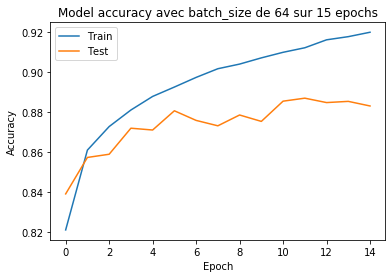

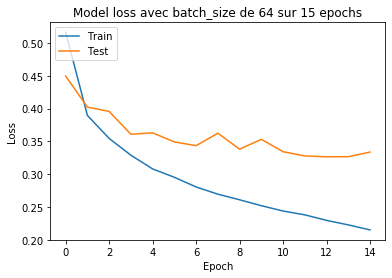

In [35]:
model = Sequential()

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 64
nb_epochs = 15
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=nb_epochs, batch_size=batch_size)

plot("accuracy", history, batch_size, nb_epochs)
plot("loss", history, batch_size, nb_epochs)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 12s 195us/step - loss: 0.4858 - accuracy: 0.8276 - val_loss: 0.4054 - val_accuracy: 0.8534
Epoch 2/15
60000/60000 [==============================] - 12s 194us/step - loss: 0.3614 - accuracy: 0.8686 - val_loss: 0.3835 - val_accuracy: 0.8620
Epoch 3/15
60000/60000 [==============================] - 11s 182us/step - loss: 0.3248 - accuracy: 0.8807 - val_loss: 0.3426 - val_accuracy: 0.8757
Epoch 4/15
60000/60000 [==============================] - 11s 182us/step - loss: 0.2982 - accuracy: 0.8906 - val_loss: 0.3746 - val_accuracy: 0.8650
Epoch 5/15
60000/60000 [==============================] - 11s 182us/step - loss: 0.2808 - accuracy: 0.8957 - val_loss: 0.3562 - val_accuracy: 0.8648
Epoch 6/15
60000/60000 [==============================] - 11s 191us/step - loss: 0.2664 - accuracy: 0.9011 - val_loss: 0.3422 - val_accuracy: 0.8777
Epoch 7/15
60000/60000 [==============================] 

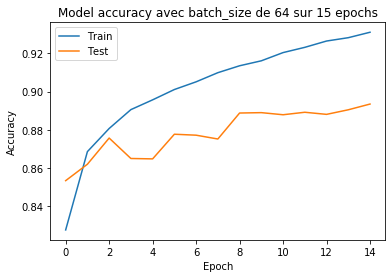

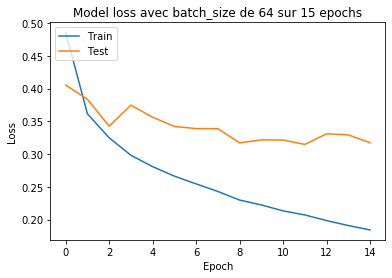

In [40]:
model = Sequential()

model.add(Flatten())

model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 64
nb_epochs = 15
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=nb_epochs, batch_size=batch_size)

plot("accuracy", history, batch_size, nb_epochs)
plot("loss", history, batch_size, nb_epochs)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 19s 323us/step - loss: 0.4739 - accuracy: 0.8318 - val_loss: 0.4685 - val_accuracy: 0.8265
Epoch 2/15
60000/60000 [==============================] - 19s 312us/step - loss: 0.3617 - accuracy: 0.8687 - val_loss: 0.3745 - val_accuracy: 0.8630
Epoch 3/15
60000/60000 [==============================] - 19s 316us/step - loss: 0.3206 - accuracy: 0.8822 - val_loss: 0.3641 - val_accuracy: 0.8687
Epoch 4/15
60000/60000 [==============================] - 19s 315us/step - loss: 0.2978 - accuracy: 0.8900 - val_loss: 0.3481 - val_accuracy: 0.8725
Epoch 5/15
60000/60000 [==============================] - 19s 314us/step - loss: 0.2777 - accuracy: 0.8959 - val_loss: 0.3526 - val_accuracy: 0.8700
Epoch 6/15
60000/60000 [==============================] - 19s 313us/step - loss: 0.2628 - accuracy: 0.9022 - val_loss: 0.3207 - val_accuracy: 0.8857
Epoch 7/15
60000/60000 [==============================] 

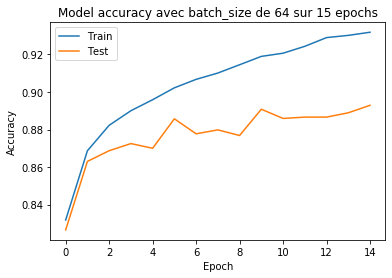

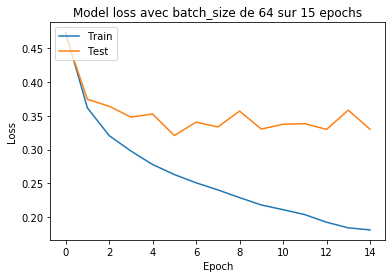

In [42]:
model = Sequential()

model.add(Flatten())

model.add(Dense(units=1024, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 64
nb_epochs = 15
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=nb_epochs, batch_size=batch_size)

plot("accuracy", history, batch_size, nb_epochs)
plot("loss", history, batch_size, nb_epochs)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 31s 515us/step - loss: 0.4893 - accuracy: 0.8223 - val_loss: 0.4367 - val_accuracy: 0.8428
Epoch 2/50
60000/60000 [==============================] - 33s 552us/step - loss: 0.3686 - accuracy: 0.8642 - val_loss: 0.3780 - val_accuracy: 0.8636
Epoch 3/50
60000/60000 [==============================] - 34s 563us/step - loss: 0.3257 - accuracy: 0.8791 - val_loss: 0.4112 - val_accuracy: 0.8571
Epoch 4/50
60000/60000 [==============================] - 35s 589us/step - loss: 0.3069 - accuracy: 0.8871 - val_loss: 0.3507 - val_accuracy: 0.8721
Epoch 5/50
60000/60000 [==============================] - 31s 523us/step - loss: 0.2888 - accuracy: 0.8922 - val_loss: 0.3574 - val_accuracy: 0.8696
Epoch 6/50
60000/60000 [==============================] - 31s 515us/step - loss: 0.2735 - accuracy: 0.8976 - val_loss: 0.3504 - val_accuracy: 0.8679
Epoch 7/50
60000/60000 [==============================] 

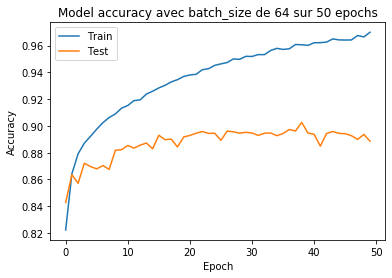

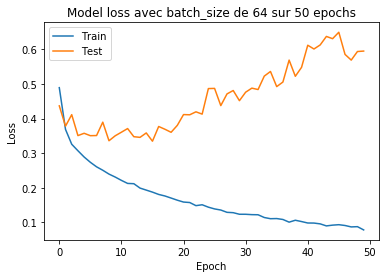

In [36]:
model = Sequential()

model.add(Flatten())

model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 64
nb_epochs = 50
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=nb_epochs, batch_size=batch_size)

plot("accuracy", history, batch_size, nb_epochs)
plot("loss", history, batch_size, nb_epochs)

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 33s 548us/step - loss: 0.4997 - accuracy: 0.8195 - val_loss: 0.4426 - val_accuracy: 0.8474
Epoch 2/25
60000/60000 [==============================] - 32s 527us/step - loss: 0.3750 - accuracy: 0.8640 - val_loss: 0.3821 - val_accuracy: 0.8595
Epoch 3/25
60000/60000 [==============================] - 32s 538us/step - loss: 0.3395 - accuracy: 0.8751 - val_loss: 0.4044 - val_accuracy: 0.8584
Epoch 4/25
60000/60000 [==============================] - 32s 541us/step - loss: 0.3132 - accuracy: 0.8853 - val_loss: 0.3572 - val_accuracy: 0.8701
Epoch 5/25
60000/60000 [==============================] - 33s 551us/step - loss: 0.2974 - accuracy: 0.8897 - val_loss: 0.3460 - val_accuracy: 0.8755
Epoch 6/25
60000/60000 [==============================] - 33s 545us/step - loss: 0.2789 - accuracy: 0.8960 - val_loss: 0.3554 - val_accuracy: 0.8756
Epoch 7/25
60000/60000 [==============================] 

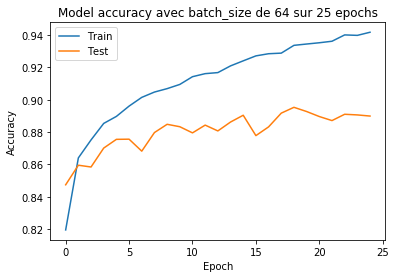

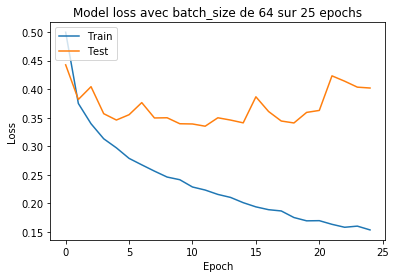

In [37]:
model = Sequential()

model.add(Flatten())

model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=512, activation='relu'))

model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 64
nb_epochs = 25
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=nb_epochs, batch_size=batch_size)

plot("accuracy", history, batch_size, nb_epochs)
plot("loss", history, batch_size, nb_epochs)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 24s 408us/step - loss: 0.4351 - accuracy: 0.8443 - val_loss: 0.3594 - val_accuracy: 0.8689
Epoch 2/10
60000/60000 [==============================] - 24s 405us/step - loss: 0.3017 - accuracy: 0.8898 - val_loss: 0.3102 - val_accuracy: 0.8878
Epoch 3/10
60000/60000 [==============================] - 24s 395us/step - loss: 0.2531 - accuracy: 0.9062 - val_loss: 0.3042 - val_accuracy: 0.8873
Epoch 4/10
60000/60000 [==============================] - 24s 395us/step - loss: 0.2190 - accuracy: 0.9201 - val_loss: 0.2935 - val_accuracy: 0.8951
Epoch 5/10
60000/60000 [==============================] - 24s 393us/step - loss: 0.1925 - accuracy: 0.9296 - val_loss: 0.3189 - val_accuracy: 0.8886
Epoch 6/10
60000/60000 [==============================] - 23s 381us/step - loss: 0.1684 - accuracy: 0.9379 - val_loss: 0.2908 - val_accuracy: 0.9008
Epoch 7/10
60000/60000 [==============================] 

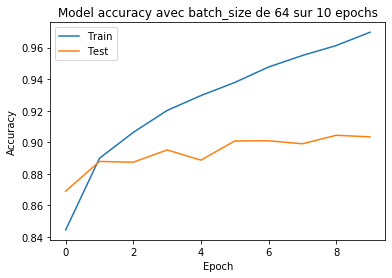

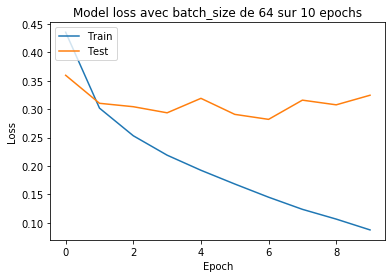

In [27]:
model = Sequential()

model.add(Conv2D(8, kernel_size=3, input_shape=(28, 28, 1), activation='relu'))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 64
nb_epochs = 10
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=nb_epochs, batch_size=batch_size)

plot("accuracy", history, batch_size, nb_epochs)
plot("loss", history, batch_size, nb_epochs)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 73s 1ms/step - loss: 0.3949 - accuracy: 0.8576 - val_loss: 0.3239 - val_accuracy: 0.8803
Epoch 2/15
60000/60000 [==============================] - 72s 1ms/step - loss: 0.2580 - accuracy: 0.9033 - val_loss: 0.2984 - val_accuracy: 0.8883
Epoch 3/15
60000/60000 [==============================] - 73s 1ms/step - loss: 0.2107 - accuracy: 0.9214 - val_loss: 0.2679 - val_accuracy: 0.9043
Epoch 4/15
60000/60000 [==============================] - 71s 1ms/step - loss: 0.1703 - accuracy: 0.9363 - val_loss: 0.3060 - val_accuracy: 0.8956
Epoch 5/15
60000/60000 [==============================] - 72s 1ms/step - loss: 0.1374 - accuracy: 0.9490 - val_loss: 0.2799 - val_accuracy: 0.9062
Epoch 6/15
60000/60000 [==============================] - 66s 1ms/step - loss: 0.1085 - accuracy: 0.9593 - val_loss: 0.3208 - val_accuracy: 0.9071
Epoch 7/15
60000/60000 [==============================] - 72s 1ms/st

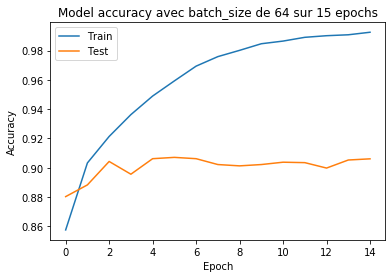

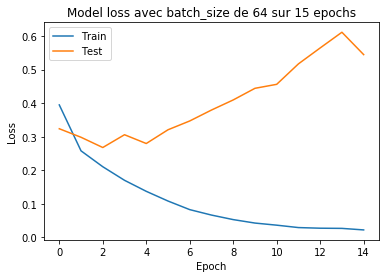

In [32]:
model = Sequential()

model.add(Conv2D(32, kernel_size=3, input_shape=(28, 28, 1), activation='relu'))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 64
nb_epochs = 15
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=nb_epochs, batch_size=batch_size)

plot("accuracy", history, batch_size, nb_epochs)
plot("loss", history, batch_size, nb_epochs)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 115s 2ms/step - loss: 0.3877 - accuracy: 0.8591 - val_loss: 0.3183 - val_accuracy: 0.8869
Epoch 2/15
60000/60000 [==============================] - 119s 2ms/step - loss: 0.2431 - accuracy: 0.9097 - val_loss: 0.2563 - val_accuracy: 0.9063
Epoch 3/15
60000/60000 [==============================] - 117s 2ms/step - loss: 0.1844 - accuracy: 0.9311 - val_loss: 0.2414 - val_accuracy: 0.9163
Epoch 4/15
60000/60000 [==============================] - 109s 2ms/step - loss: 0.1370 - accuracy: 0.9498 - val_loss: 0.2500 - val_accuracy: 0.9154
Epoch 5/15
60000/60000 [==============================] - 107s 2ms/step - loss: 0.0973 - accuracy: 0.9636 - val_loss: 0.3046 - val_accuracy: 0.9081
Epoch 6/15
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0662 - accuracy: 0.9761 - val_loss: 0.3185 - val_accuracy: 0.9104
Epoch 7/15
60000/60000 [==============================] - 109s

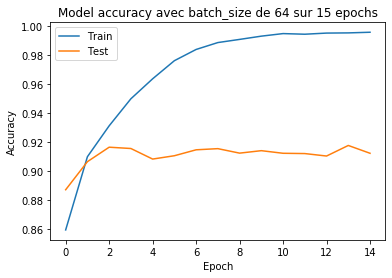

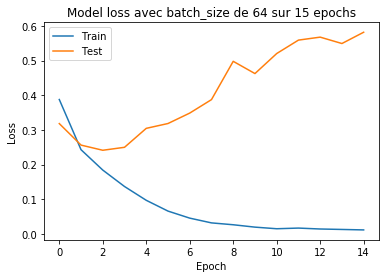

In [38]:
model = Sequential()

model.add(Conv2D(32, kernel_size=3, input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, kernel_size=3, input_shape=(28, 28, 1), activation='relu'))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 64
nb_epochs = 15
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=nb_epochs, batch_size=batch_size)

plot("accuracy", history, batch_size, nb_epochs)
plot("loss", history, batch_size, nb_epochs)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 41s 687us/step - loss: 0.4447 - accuracy: 0.8407 - val_loss: 0.3310 - val_accuracy: 0.8830
Epoch 2/15
60000/60000 [==============================] - 43s 718us/step - loss: 0.2906 - accuracy: 0.8948 - val_loss: 0.3165 - val_accuracy: 0.8857
Epoch 3/15
60000/60000 [==============================] - 41s 676us/step - loss: 0.2407 - accuracy: 0.9120 - val_loss: 0.2559 - val_accuracy: 0.9067
Epoch 4/15
60000/60000 [==============================] - 44s 729us/step - loss: 0.2059 - accuracy: 0.9249 - val_loss: 0.2388 - val_accuracy: 0.9117
Epoch 5/15
60000/60000 [==============================] - 46s 770us/step - loss: 0.1815 - accuracy: 0.9329 - val_loss: 0.2419 - val_accuracy: 0.9150
Epoch 6/15
60000/60000 [==============================] - 42s 706us/step - loss: 0.1572 - accuracy: 0.9421 - val_loss: 0.2246 - val_accuracy: 0.9221
Epoch 7/15
60000/60000 [==============================] 

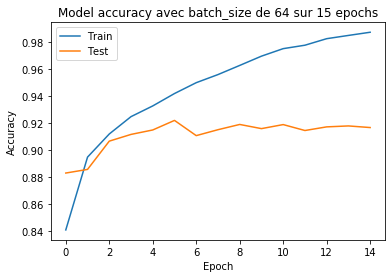

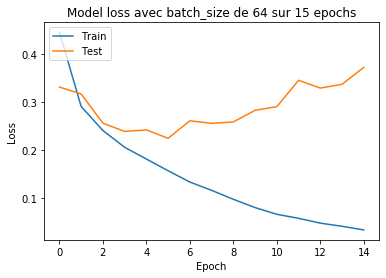

In [4]:
model = Sequential()

model.add(Conv2D(32, kernel_size=3, input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=3, input_shape=(28, 28, 1), activation='relu'))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 64
nb_epochs = 15
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=nb_epochs, batch_size=batch_size)

plot("accuracy", history, batch_size, nb_epochs)
plot("loss", history, batch_size, nb_epochs)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 42s 703us/step - loss: 0.4691 - accuracy: 0.8292 - val_loss: 0.3471 - val_accuracy: 0.8744
Epoch 2/15
60000/60000 [==============================] - 45s 749us/step - loss: 0.3049 - accuracy: 0.8900 - val_loss: 0.3317 - val_accuracy: 0.8807
Epoch 3/15
60000/60000 [==============================] - 43s 709us/step - loss: 0.2654 - accuracy: 0.9029 - val_loss: 0.2927 - val_accuracy: 0.8936
Epoch 4/15
60000/60000 [==============================] - 42s 707us/step - loss: 0.2347 - accuracy: 0.9135 - val_loss: 0.2677 - val_accuracy: 0.9065
Epoch 5/15
60000/60000 [==============================] - 42s 702us/step - loss: 0.2092 - accuracy: 0.9223 - val_loss: 0.2713 - val_accuracy: 0.9048
Epoch 6/15
60000/60000 [==============================] - 44s 732us/step - loss: 0.1889 - accuracy: 0.9295 - val_loss: 0.2627 - val_accuracy: 0.9077
Epoch 7/15
60000/60000 [==============================] 

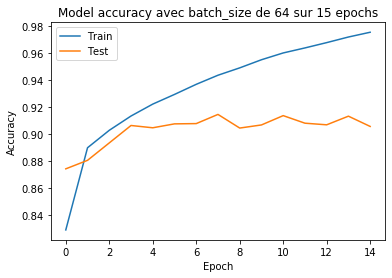

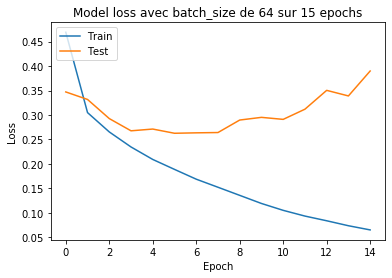

In [7]:
model = Sequential()

model.add(Conv2D(32, kernel_size=5, input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=5, input_shape=(28, 28, 1), activation='relu'))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 64
nb_epochs = 15
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=nb_epochs, batch_size=batch_size)

plot("accuracy", history, batch_size, nb_epochs)
plot("loss", history, batch_size, nb_epochs)